<a href="https://colab.research.google.com/github/C3Suryansu/CSK-Winning-Strategy-Analysis/blob/main/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chennai Super Kings - Winning Strategy

We all know that CSK is one of the most successful franchises in IPL

It has a stellar record:
  - Managed to reach 9/10 finals
  - Won 4 times

And it has also delivered consistently (Not a lot of teams can say that)

#### But what's the secret behind this success ?

Today, lets see how some simple code and plots can give us the winning strategy of CSK

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/465/original/IPLPlayerAuctionData.csv?1667889152 -O auctiondata.csv
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/466/original/deliveries.csv?1667889213 -O deliveries.csv
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/467/original/matches.csv?1667889250 -O matches.csv

--2022-11-23 12:18:21--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/465/original/IPLPlayerAuctionData.csv?1667889152
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62612 (61K) [text/plain]
Saving to: ‘auctiondata.csv’

auctiondata.csv     100%[===================>]  61.14K   299KB/s    in 0.2s    

2022-11-23 12:18:22 (299 KB/s) - ‘auctiondata.csv’ saved [62612/62612]

--2022-11-23 12:18:22--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/466/original/deliveries.csv?1667889213
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443..

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

We have 3 datasets:

1. `auction.csv`:
  - Info about which players are bought for what prices and by which team


In [ ]:
auction = pd.read_csv('auctiondata.csv')
auction.head()

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


2. `matches.csv`:
  - Info about the winners of all the matches
  - Also contains attributes such as toss_winner, win_by_runs etc

In [ ]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


3. `deliveries.csv`:
  - Info about all the deliveries of all the matches in IPL (2008 onwards)


In [ ]:
delv = pd.read_csv('deliveries.csv')
delv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


There is one problem with this dataset

This dataset doesn't contain info about which year the match was played in

#### How can we find the year in which each match was played ?
  - Notice that the `deliveries` dataset contains:
    - **id**
    - **season**
  - **id** is also there in `matches`

#### So can we use the **id** column of `deliveries` to find out the **year** of each match played in `matches` ?
  - Yes

Lets see how we can do this

In [ ]:
matches_with_year = matches[['id','season']].merge(delv, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
matches_with_year.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
CSK_matches = matches[(matches["team1"] == "Chennai Super Kings") | (matches["team2"] == "Chennai Super Kings")]
CSK_delv = delv[(delv["bowling_team"] == "Chennai Super Kings") | (delv["batting_team"] == "Chennai Super Kings")]
CSK_auction = auction[(auction["Team"] == "Chennai Super Kings")]

Lets first look at some of CSK's glories

#### Which team do you think managed to reach the finals max number of times ?

Lets find out

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


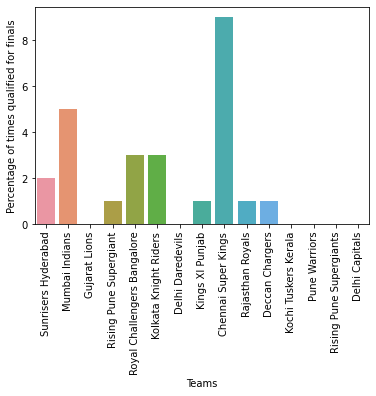

In [ ]:
final_matches = matches.drop_duplicates(subset=['season'], keep='last')
team_list = matches['team1'].unique()
f_count = {}
for team in team_list:
  f_count[team] = final_matches.loc[(final_matches['team1']==team) | (final_matches['team2']==team)].shape[0]
f_count
for team in f_count:
  if team == 'Chennai Super Kings' or team == 'Kolkata Knight Riders': 
    f_count[team] += 1
sns.barplot(team_list, list(f_count.values()))
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Percentage of times qualified for finals')
plt.show()

In [ ]:
df = pd.DataFrame(f_count, np.arange(10)).T
df=df[0]
df.head(10)
data= df.to_frame().reset_index()
data.rename(columns = {'index':'Team', 0:'Win Count'}, inplace=True)
data
data.to_excel('winCount.xlsx', index=False)

In [ ]:
final_matches = matches.drop_duplicates(subset=['season'], keep='last')
team_list = matches['team1'].unique()
final_perc = {}
for team in team_list:
  final_perc[team] = final_matches.loc[(final_matches['team1']==team) | (final_matches['team2']==team)].shape[0]/final_matches.shape[0] * 100
final_perc
sns.barplot(team_list, list(final_perc.values()))
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Percentage of times qualified for finals')
plt.show()

#### What can we infer from this plot ?
  - CSK managed to reach finals of 70% of the total seasons
  - This is much higher than the second max which is around 45%

Now we understand how great CSK is

#### But how can we use these datasets to find out CSK's winning mantra ?

There are several aspects to this

#### What do you think makes a good team ?
- Good batsmen ... Good bowlers ... Good team management

It turns out that these are not enough

#### Whats the one strategy of CSK that makes it different ?

Lets check their stats for finding this out

And we will begin with the Auction day

Lets compare the amount spent by CSK in auctions 2013 onwards with average money spent by other teams

Year
2013.0    9.904167e+07
2014.0    3.282500e+08
2015.0    1.095000e+08
2016.0    1.700000e+08
2017.0    1.139375e+08
2018.0    5.396250e+08
2019.0    1.335000e+08
2020.0    1.751250e+08
2021.0    1.816250e+08
2022.0    5.517000e+08
Name: Amount, dtype: float64


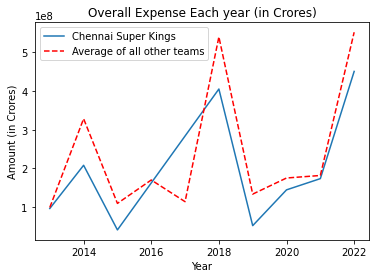

In [ ]:
teams = ["Royal Challengers Bangalore",
         "Mumbai Indians",
         "Chennai Super Kings",
         ]

# for i in teams:
#   plt.plot(auction[auction["Team"] == i].groupby('Year')['Amount'].sum())

plt.plot(auction[auction["Team"] == "Chennai Super Kings"].groupby('Year')['Amount'].sum())


df = auction.groupby(['Team', 'Year'])['Amount'].sum().reset_index()
print(df.groupby('Year')['Amount'].mean())
plt.plot(df.groupby('Year')['Amount'].mean(), "r--")

plt.title('Overall Expense Each year (in Crores)')
plt.ylabel('Amount (in Crores)')
plt.xlabel('Year')
plt.legend(["Chennai Super Kings", "Average of all other teams"])
plt.show()

#### What can we infer from this plot ?
  - CSK has consistently spent less than average money in all the years it has participated in the auction

#### Does this mean that CSK bought less expensive/less talented players ?
#### Or is it because they bought lesser number of players ?

Lets first check the average money they spend on a player compared to rest of the teams


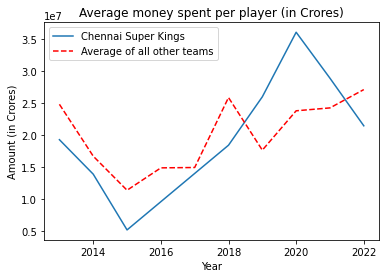

In [ ]:
plt.plot(auction[auction["Team"] == "Chennai Super Kings"].groupby('Year')['Amount'].mean())

df = auction.groupby(['Team', 'Year'])['Amount'].mean().reset_index()
plt.plot(df.groupby('Year')['Amount'].mean(), "r--")

plt.title('Average money spent per player (in Crores)')
plt.ylabel('Amount (in Crores)')
plt.xlabel('Year')
plt.legend(["Chennai Super Kings", "Average of all other teams"])
plt.show()

#### What can we observe from this plot ?
  - Avg money spent per player by CSK was less in initial years but increased over time
  - This however does not give any conclusive results

Lets verify the number of players bought by CSK as compared to others

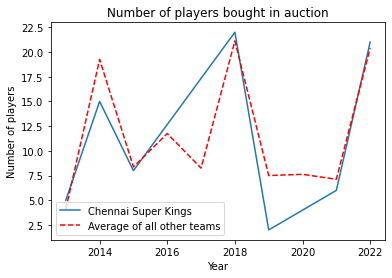

In [ ]:
# for team in teams:
#   plt.plot(auction[auction["Team"] == team].groupby('Year')['Player'].count())

plt.plot(auction[auction["Team"] == "Chennai Super Kings"].groupby('Year')['Player'].count())

df = auction.groupby(['Team', 'Year'])['Player'].count().reset_index()
plt.plot(df.groupby('Year')['Player'].mean(), "r--")

plt.title('Number of players bought in auction')
plt.ylabel('Number of players')
plt.xlabel('Year')
plt.legend(["Chennai Super Kings", "Average of all other teams"])
plt.show()

In [ ]:
# df = auction.groupby(['Team', 'Year'])['Player'].count().reset_index()
# df = df[(df["Team"] == "Chennai Super Kings") | (df["Team"] == "Mumbai Indians") | (df["Team"] == "Royal Challengers Bangalore")]
# df = df.pivot(index="Year", columns="Team", values="Player")
# df.plot.barh()
# plt.title('Number of players bought in auction')
# plt.ylabel('Number of players')
# plt.xlabel('Year')
# plt.show()

#### What can be inferred from this ?
  - CSK has bought lesser than average number of players in almost all years

#### What does this imply though ?
  - That maybe CSK retains most of its players year-after-year

Lets check if this is true

First we will compare the number of new bowlers CSK different from its previous year and compare it with the other teams

For the sake of comparison lets choose some high performing teams rather than taking the average to get a better estimate

Royal Challengers Bangalore: 5.333333333333333
Mumbai Indians: 5.333333333333333
Kolkata Knight Riders: 4.555555555555555
Kings XI Punjab: 4.555555555555555
Delhi Daredevils: 4.666666666666667
Chennai Super Kings: 3.3333333333333335
Rajasthan Royals: 5.333333333333333


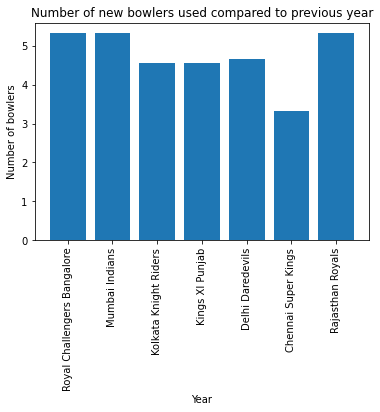

In [ ]:
teams = ["Royal Challengers Bangalore",
         "Mumbai Indians",
         "Kolkata Knight Riders",
         "Kings XI Punjab",
         "Delhi Daredevils",
         "Chennai Super Kings",
         "Rajasthan Royals"
         ]

bowler_avg = {}

for team in teams:
  c = 0
  flag = 1
  freq = 0
  for i in range(2008, 2022):

    if i==2016 or i==2017:
      continue

    arr = np.sort(matches_with_year[(matches_with_year["bowling_team"] == team) & (matches_with_year["season"] == i)]["bowler"].unique())

    if flag == 1:
      prev = arr
      flag = 0
    
    else:
      if i != 2014 and i != 2018:
        c += np.setdiff1d(arr, prev).shape[0]
        freq += 1
      prev = arr

  print(f"{team}: {c/freq}")
  bowler_avg[team] = c/freq

plt.bar(teams, bowler_avg.values())
plt.title('Number of new bowlers used compared to previous year')
plt.ylabel('Number of bowlers')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.show()

#### What can be observed from this plot ?
  - CSK buys the least average number of bowlers every year
  - This means it retains most of its bowlers

Lets check if this is the case with the batting squad as well

Royal Challengers Bangalore: 7.111111111111111
Mumbai Indians: 6.111111111111111
Kolkata Knight Riders: 5.777777777777778
Kings XI Punjab: 6.0
Delhi Daredevils: 6.222222222222222
Chennai Super Kings: 3.4444444444444446
Rajasthan Royals: 6.555555555555555


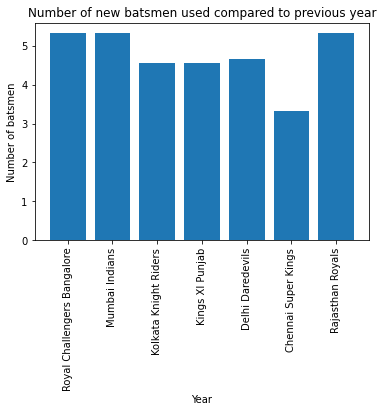

In [ ]:
batsman_avg = {}

for team in teams:
  c = 0
  flag = 1
  freq = 0
  for i in range(2008, 2022):

    if i==2016 or i==2017:
      continue

    arr = np.sort(matches_with_year[(matches_with_year["batting_team"] == team) & (matches_with_year["season"] == i)]["batsman"].unique())

    if flag == 1:
      prev = arr
      flag = 0
    
    else:
      if i != 2014 and i != 2018:
        c += np.setdiff1d(arr, prev).shape[0]
        freq += 1
      prev = arr

  print(f"{team}: {c/freq}")
  batsman_avg[team] = c/freq

plt.bar(teams, bowler_avg.values())
plt.title('Number of new batsmen used compared to previous year')
plt.ylabel('Number of batsmen')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.show()

And this proves our point 

CSK retains most of its batting/bowling squad year-after-year

#### How can this retention be helpful though ?
  1. Helps in establishing confidence/trust in the team
  2. Establishing good teamwork and synergy
  3. Also alleviates the problem of adapting to new teams again and again

Now lets analyse CSK's stats season-by-season

First lets check how much CSK changes its playing XI squad in a season and compare it with two of its biggest rivals - MI & RCB

In [ ]:
matches_with_year.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Royal Challengers Bangalore: 19.7
Mumbai Indians: 17.9
Kolkata Knight Riders: 17.7
Kings XI Punjab: 18.2
Delhi Daredevils: 16.7
Chennai Super Kings: 15.4
Rajasthan Royals: 19.1


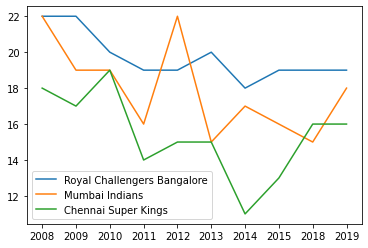

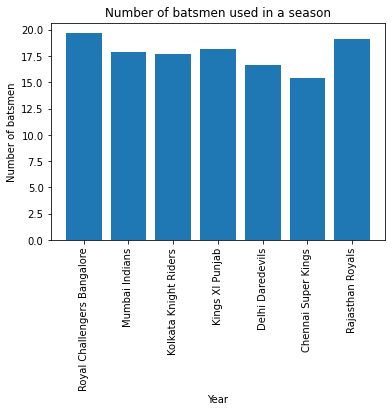

In [ ]:
batter_avg = {}
batter_freq = {}

team3 = ["Royal Challengers Bangalore",
         "Mumbai Indians",
         "Chennai Super Kings"
         ]

yrs = []

for team in teams:
  c = 0
  batter_freq[team] = []
  for i in range(2008, 2020):

    if i==2016 or i==2017:
      continue

    arr = np.sort(matches_with_year[(matches_with_year["batting_team"] == team) & (matches_with_year["season"] == i)]["batsman"].unique())
    c += arr.shape[0]
    batter_freq[team].append(arr.shape[0])
    yrs.append(i)

  print(f"{team}: {c/10}")
  batter_avg[team] = c/10
  if team in team3:
    plt.plot(batter_freq[team])

plt.legend(team3)
plt.xticks([i for i in range(10)], yrs[:10])
plt.show()

plt.bar(teams, batter_avg.values())
plt.title('Number of batsmen used in a season')
plt.ylabel('Number of batsmen')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
batter_freq

{'Royal Challengers Bangalore': [22, 22, 20, 19, 19, 20, 18, 19, 19, 19],
 'Mumbai Indians': [22, 19, 19, 16, 22, 15, 17, 16, 15, 18],
 'Kolkata Knight Riders': [19, 21, 21, 16, 14, 21, 16, 16, 16, 17],
 'Kings XI Punjab': [19, 16, 20, 18, 21, 19, 17, 18, 17, 17],
 'Delhi Daredevils': [15, 16, 21, 21, 20, 21, 18, 16, 19, 0],
 'Chennai Super Kings': [18, 17, 19, 14, 15, 15, 11, 13, 16, 16],
 'Rajasthan Royals': [19, 22, 23, 20, 16, 19, 21, 15, 18, 18]}

#### What can be inferred from the above plots ?
  - CSK uses the least number of batsman in a season
  - This means it keeps its batting squad more-or-less same as compared to others
  - This is another differentiating factor of CSK

Lets check the same for the bowling squad as well

Royal Challengers Bangalore: 13.7
Mumbai Indians: 13.9
Kolkata Knight Riders: 13.3
Kings XI Punjab: 12.8
Delhi Daredevils: 12.8
Chennai Super Kings: 11.6
Rajasthan Royals: 13.7


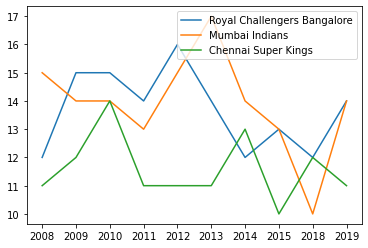

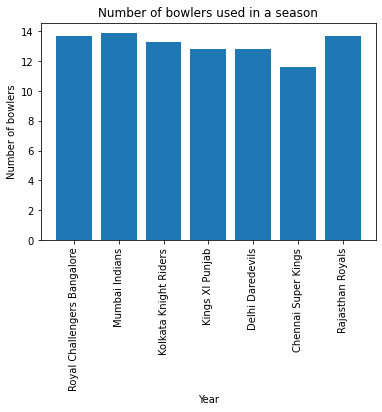

In [ ]:
bowler_avg = {}
bowler_freq = {}

for team in teams:
  c = 0
  bowler_freq[team] = []
  for i in range(2008, 2020):

    if i==2016 or i==2017:
      continue

    arr = np.sort(matches_with_year[(matches_with_year["bowling_team"] == team) & (matches_with_year["season"] == i)]["bowler"].unique())
    c += arr.shape[0]
    bowler_freq[team].append(arr.shape[0])

  print(f"{team}: {c/10}")
  bowler_avg[team] = c/10
  if team in team3:
    plt.plot(bowler_freq[team])

plt.legend(team3)
plt.xticks([i for i in range(10)], yrs[:10])
plt.show()

plt.bar(teams, bowler_avg.values())
plt.title('Number of bowlers used in a season')
plt.ylabel('Number of bowlers')
plt.xlabel('Teams')
plt.xticks(rotation = 90)
plt.show()


In [ ]:
bowler_freq

{'Royal Challengers Bangalore': [12, 15, 15, 14, 16, 14, 12, 13, 12, 14],
 'Mumbai Indians': [15, 14, 14, 13, 15, 17, 14, 13, 10, 14],
 'Kolkata Knight Riders': [12, 16, 18, 11, 13, 15, 12, 13, 11, 12],
 'Kings XI Punjab': [11, 13, 15, 13, 14, 15, 11, 13, 10, 13],
 'Delhi Daredevils': [12, 14, 16, 15, 16, 14, 14, 13, 14, 0],
 'Chennai Super Kings': [11, 12, 14, 11, 11, 11, 13, 10, 12, 11],
 'Rajasthan Royals': [10, 14, 17, 14, 13, 16, 14, 13, 13, 13]}

On the basis of above plots its clear that CSK tries to retain its squad in a season as well as year-after-year

#### How can this be helpful though ?
  
  1. Helps with the confidence factor
    - Even if a player does not play well for few matches, he is trusted by the team till the end
  
  2. Better utilisation of good players
    - As we saw earlier, CSK only takes quality players
    - Using them consistently leads to a better performance

This data has told us about the retention strategy adopted by the team management of CSK

Lets see if there is a unique strategy used by CSK while playing as well

First lets check the average runs scored by CSK in powerplay (i.e. overs 1-6) and compare it with other teams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


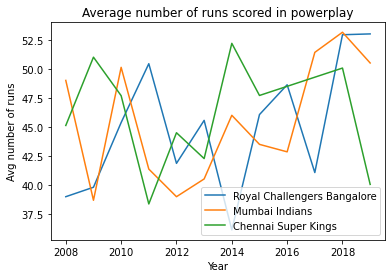

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


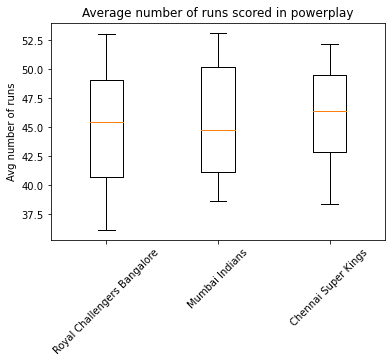

In [ ]:
plotss = []
for i in range(3):
  team_pp = matches_with_year[matches_with_year["batting_team"] == team3[i]][matches_with_year["over"] < 7]
  an = team_pp.groupby("season")["total_runs"].sum()/team_pp.groupby("season")["match_id"].nunique()
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of runs scored in powerplay')
plt.ylabel('Avg number of runs')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of runs scored in powerplay')
plt.ylabel('Avg number of runs')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

#### What can we infer from the above plot ?
  - CSK scored a good number of runs in the powerplay
  - Infact the average number of runs scored by CSK in powerplay is the max
  - But this doesn't show a lot of pattern about CSK's better performance

#### What about the wickets they take in powerplay ?

Lets check

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


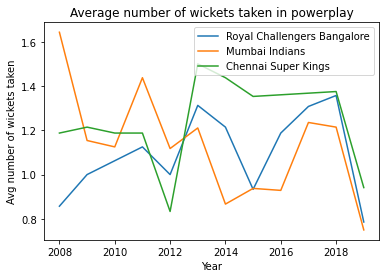

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


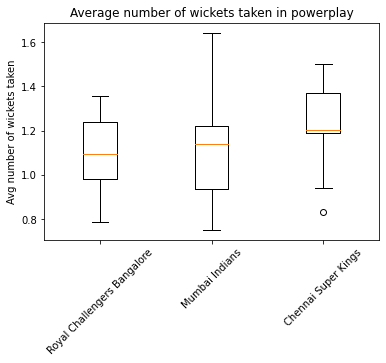

In [ ]:
plotss = []
data_dict = {}
for team in team3:
  
  team_pp = matches_with_year[matches_with_year["bowling_team"] == team][matches_with_year["over"] < 7]
  an = (team_pp.groupby("season")["player_dismissed"].nunique()-1)/team_pp.groupby("season")["match_id"].nunique()
  
  data_dict[team] = an
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of wickets taken in powerplay')
plt.ylabel('Avg number of wickets taken')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of wickets taken in powerplay')
plt.ylabel('Avg number of wickets taken')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

In [ ]:
powerplay_df = pd.DataFrame(data_dict).T.reset_index()
pdf = powerplay_df.melt(id_vars = 'index', var_name = 'season', value_name='wickets taken')
pdf.rename(columns = {'index':'Team'}, inplace=True)
pdf['season'] = pdf['season']
pdf
pdf.to_excel('powerplay_wickets_taken.xlsx', index=False)

#### What can we see from this plot ?
  - CSK is very efficient at taking wickets in the powerplay
  - It has done so consistently over the years
  - Moreover the minimum no. of wickets they take in the powerplay is also very high cimpared to the others

Lets check how many of CSK's wickets fall in the powerplay as compared to others

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


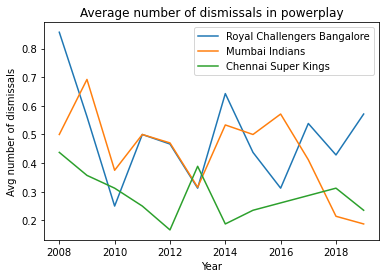

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


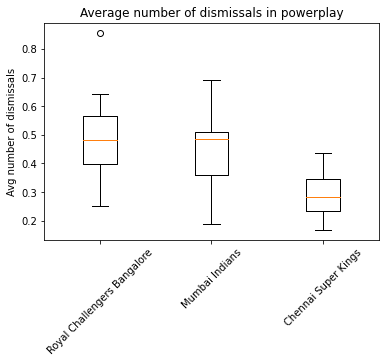

In [ ]:
plotss = []
for team in team3:
  
  team_pp = matches_with_year[matches_with_year["batting_team"] == team][matches_with_year["over"] < 7]
  an = (team_pp.groupby("season")["player_dismissed"].nunique()-1)/team_pp.groupby("season")["match_id"].nunique()
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of dismissals in powerplay')
plt.ylabel('Avg number of dismissals')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of dismissals in powerplay')
plt.ylabel('Avg number of dismissals')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

This plot proves that CSK's loses the least wickets out of three teams

#### So what can we conclude about the powerplay strategy of CSK ?
  - Scores slightly lesser runs but preserves its wickets
  - Successfully takes a lot of wickets in the powerplay

Lets now make a similar analysis for the death overs as well

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


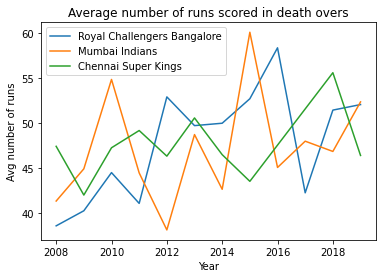

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


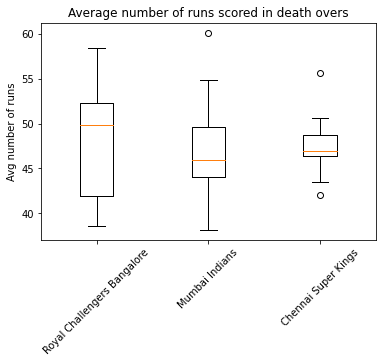

In [ ]:
plotss = []
for i in range(3):
  team_pp = matches_with_year[matches_with_year["batting_team"] == team3[i]][matches_with_year["over"] >= 16]
  an = team_pp.groupby("season")["total_runs"].sum()/team_pp.groupby("season")["match_id"].nunique()
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of runs scored in death overs')
plt.ylabel('Avg number of runs')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of runs scored in death overs')
plt.ylabel('Avg number of runs')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


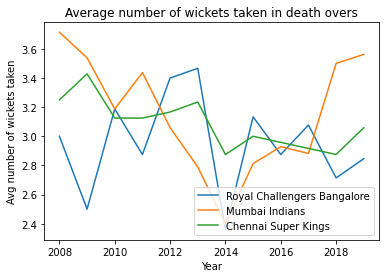

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


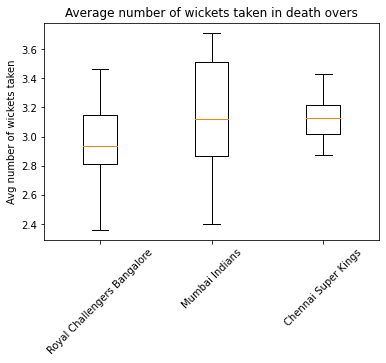

In [ ]:
plotss = []
for team in team3:
  
  team_pp = matches_with_year[matches_with_year["bowling_team"] == team][matches_with_year["over"] >= 10]
  an = (team_pp.groupby("season")["player_dismissed"].nunique()-1)/team_pp.groupby("season")["match_id"].nunique()
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of wickets taken in death overs')
plt.ylabel('Avg number of wickets taken')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of wickets taken in death overs')
plt.ylabel('Avg number of wickets taken')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


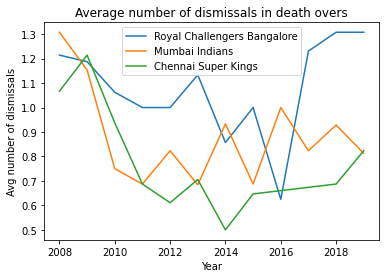

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


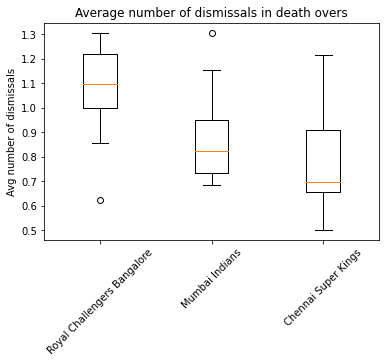

In [ ]:
plotss = []
for team in team3:
  
  team_pp = matches_with_year[matches_with_year["batting_team"] == team][matches_with_year["over"] >= 10]
  an = (team_pp.groupby("season")["player_dismissed"].nunique()-1)/team_pp.groupby("season")["match_id"].nunique()
  plt.plot(an)
  plotss.append(an)

plt.title('Average number of dismissals in death overs')
plt.ylabel('Avg number of dismissals')
plt.xlabel('Year')
plt.legend(team3)
plt.show()

plt.boxplot(plotss)
plt.title('Average number of dismissals in death overs')
plt.ylabel('Avg number of dismissals')
plt.xticks([i for i in range(1, 4)], team3, rotation = 45)
plt.show()

#### What can we infer from these plots ?
  - A similar strategy of CSK can be seen in the death overs as well
  - Takes more wickets and preserves its own wicktes even if that means scoring slightly lesser runs

Finally lets check the win-by-runs and win-by-wickets comparisons CSK with other teams

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

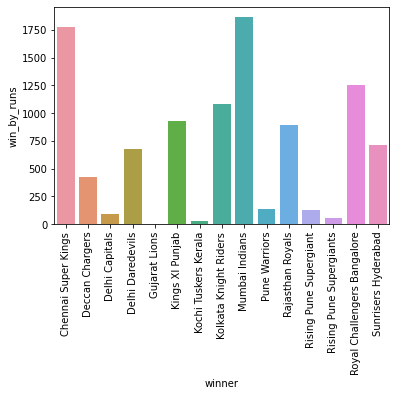

In [ ]:
grouped_data = matches.groupby('winner').sum()
sns.barplot(grouped_data.index, grouped_data['win_by_runs'])
plt.xticks(rotation=90)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

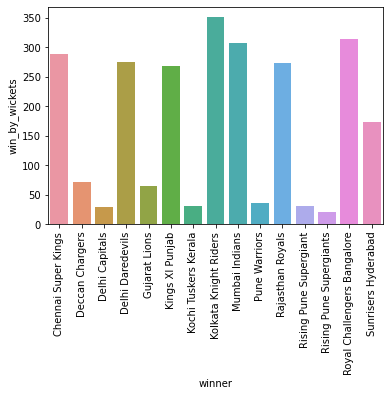

In [ ]:
sns.barplot(grouped_data.index, grouped_data['win_by_wickets'])
plt.xticks(rotation=90)

While CSK may not be best in either, it can be seen that they are much better than most in both the plots

All this makes it clear why CSK is one of the best teams

1. Excellent retention rate
2. A different strategy than other leading teams
  - Not aggressive in powerplays/death overs - Preserves wickets
  - Takes more wickets comparitively
3. Consistent performance